# Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import pandas as pd

# Functions

## Read and arrange file

In [3]:
#Read text file and divide in into a an array whose entries are the columns
def FileToArray(filename):
    file = open(filename + ".txt", "r")
    lines = file.read().splitlines() #puts the file into an array
    #lines
    return lines

#Since there are some missing data in the file, it is not possible to open the file as a astropy table. So the lines must be filled
def FillArray(lines):
    text= ''
    for i in range(1, len(lines)):

        divided_line=lines[i].split("\t")
        #print('Line', divided_line)

        if divided_line[0] != '':
            text= divided_line[0]
            #print('Text to write:', text)

        if divided_line[0] == '':
            divided_line[0] = text
            #print('New line:', divided_line)
        #print('\n')
        lines[i]=divided_line
    return lines

#Printing the correct lines in a new file
def PrintFilledFile(filename, lines):
    
    file = open(filename+"_filled"+".txt", "w")

    #print title
    for w in lines[0]:
        file.write(str(w))
    file.write("\n")

    #print data
    for i in range(1,len(lines)):
        l=lines[i]
        for w in l:
            file.write(str(w))
            if w != l[len(l)-1]:
                file.write("\t")
        file.write("\n")
    file.close()

## Dashboard

In [4]:
ALL = 'All'
#list to be shown in the drop down menus
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

#data filtering
def common_filtering(peak, sample):
    output.clear_output()    
    plot_output.clear_output()  
    
    if (peak == ALL) & (sample == ALL):
        common_filter = data
    elif (peak == ALL):
        common_filter = data[data.sample_identifier == sample]
    elif (sample == ALL):
        common_filter = data[data.name == peak]
    else:
        common_filter = data[(data.name == peak) & (data.sample_identifier == sample)]
        
    with output:
        display(common_filter)
        
    with plot_output:
        interact(graph, data=fixed(common_filter), x_axis=common_filter, y_axis=common_filter)
    
#function to build a graph
def graph(data,x_axis, y_axis):
    data.plot(kind='scatter',x=x_axis,y=y_axis, grid=True, legend=True)

#functions to update the output when a new selection occurs
def dropdown_peak_eventhandler(change):
    common_filtering(change.new, dropdown_sample.value)
    
def dropdown_sample_eventhandler(change):
    common_filtering(dropdown_peak.value, change.new)

# Main

In [5]:
#insert path, folder and name of the file to read
path="C:/Users/quadrell/OneDrive - Lancaster University/PhD Project/Data/XPS/"
folder="0012_15122020_AQ/"
file="20201215_TEMPO_5min_Analysis"
filename=path+folder+file

#Prepare file to transform into dataframe
lines=FileToArray(filename)
lines=FillArray(lines)
PrintFilledFile(filename, lines)

#initialize the data frame
data=pd.read_csv(filename+"_filled"+".txt",delimiter="\t")
#replace the spaces in the column name swith the underscore
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

#Widget for data to be displayed
output = widgets.Output()
#Widget for plot to be displayed
plot_output = widgets.Output()

#create drop down menus
dropdown_peak = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(data.name), description="Peak:")
dropdown_sample = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.sample_identifier), description="Sample:")
    
#update the data and the graph after the new selection in the dropdwon menu
dropdown_peak.observe(dropdown_peak_eventhandler, names='value')
dropdown_sample.observe(dropdown_sample_eventhandler, names='value')

# tab with data and graph
tab = widgets.Tab([output, plot_output])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Plot')

display(dropdown_peak)
display(dropdown_sample)
display(tab)

Dropdown(description='Peak:', options=('All', 'Al carbide?', 'C 1s', 'C-C', 'C-F2', 'C-N', 'C-O', 'C=O', 'F 1s…

Dropdown(description='Sample:', options=('All', 'Al', 'Au', 'HOPG', 'PTFE', 'Si'), value='All')

# Test Code

## Read and prepare the file

Read text file and divide in into a an array (lines) whose entries are the columns

In [3]:
filename= "report"
lines=FileToArray(filename)

Since there are some missing data in the file, it is not possible to open the file as a astropy table. So the lines must be filled

In [4]:
lines=FillArray(lines)

Printing the correct lines in a new file that as the same name as the previous one plus "_filled"

In [5]:
PrintFilledFile(filename, lines)

## Read the new file

Read the new file (filename+"_filled"+".txt") with the filled data

In [6]:
data=ascii.read(filename+"_filled"+".txt", guess=False, delimiter="\t")
#data

## Data manipulation

Create mask corrsponding to the peaks

In [7]:
O1s=data['Name Peak']=="O 1s"
N1s=data['Name Peak']=="N 1s"
C1s=data['Name Peak']=="C 1s"

Plot the atomic concentration

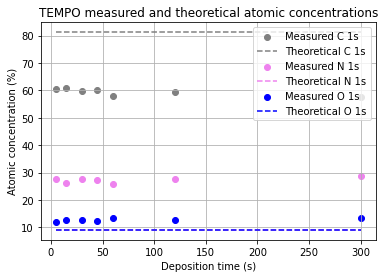

In [8]:
t=[300,120,60,45,30,15,5] #growth time

plt.scatter(t,data["%At Conc"][C1s], color="gray", label="Measured C 1s")
plt.hlines(81.2, t[-1], t[0], linestyle='--', color="gray", label="Theoretical C 1s")
plt.scatter(t,data["%At Conc"][N1s], color="violet", label="Measured N 1s")
plt.hlines(9.1, t[-1], t[0], linestyle='--', color="violet", label="Theoretical N 1s")
plt.scatter(t,data["%At Conc"][O1s], color="blue", label="Measured O 1s")
plt.hlines(9.1, t[-1], t[0], linestyle='--', color="blue", label="Theoretical O 1s")

plt.xlabel("Deposition time (s)")
plt.ylabel("Atomic concentration (%)")
plt.title("TEMPO measured and theoretical atomic concentrations")
plt.legend()
plt.grid()

## Intercative data

read data using pandas dataframe and replace the spaces in the column names with underscore

In [45]:
data=pd.read_csv(filename+"_filled"+".txt",delimiter="\t")
#replace the spaces in the column name swith the underscore
data.columns = [c.lower().replace(' ', '_') for c in data.columns]

Set up all the widgets and their update

In [52]:
#Data to be displayed
output = widgets.Output()
#plot to be displayed
plot_output = widgets.Output()

#drop down menus
dropdown_SampleIdentifier = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.sample_identifier), description="Sample:")
dropdown_NamePeak = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.name_peak), description="Peak:")

#functions to handle with new selections
dropdown_NamePeak.observe(dropdown_NamePeak_eventhandler, names='value')
dropdown_SampleIdentifier.observe(dropdown_SampleIdentifier_eventhandler, names='value')

the following cell do not work properly

In [102]:
#drop down menu in the same row
input_widgets = widgets.HBox([dropdown_NamePeak, dropdown_SampleIdentifier])

#data and graph in an interactive table
tab = widgets.Tab([output, plot_output])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Plot')
dashboard = widgets.VBox([input_widgets, tab])
#Dispaly the result in a new cell in a dashboard format
display(dashboard)

Using the tab instead of the dashboard lead to a working code

In [98]:
#Data to be displayed
output = widgets.Output()
#plot to be displayed
plot_output = widgets.Output()

dropdown_peak = widgets.Dropdown(options =    unique_sorted_values_plus_ALL(data.name_peak), description="Peak:")
dropdown_sample = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.sample_identifier), description="Sample:")
    
dropdown_peak.observe(dropdown_peak_eventhandler, names='value')
dropdown_sample.observe(dropdown_sample_eventhandler, names='value')

tab = widgets.Tab([output, plot_output])
tab.set_title(0, 'Dataset Exploration')
tab.set_title(1, 'Plot')

In [99]:
display(dropdown_peak)
display(dropdown_sample)
display(tab)

Dropdown(description='Peak:', options=('All', 'C 1s', 'N 1s', 'O 1s', 'Si 2p'), value='All')

Dropdown(description='Sample:', options=('All', '1 min', '15 s', '2 min', '30 s', '45 s', '5 min', '5 s'), val…

## Graph with interaction

In [17]:
def graph(data,x_axis, y_axis):
    data.plot(kind='scatter',x=x_axis,y=y_axis)

interact(graph, data=fixed(data), x_axis=data, y_axis=data)

interactive(children=(Dropdown(description='x_axis', options=('sample_identifier', 'name_peak', 'position', 'f…

<function __main__.graph(data, x_axis, y_axis)>

## Single filter

In [32]:
dropdown_NamePeak = widgets.Dropdown(options = unique_sorted_values_plus_ALL(data.name_peak))
output_NamePeak = widgets.Output()

def dropdown_NamePeak_eventhandler(change):
    output_NamePeak.clear_output()
    with output_NamePeak:
        if (change.new == ALL):
            display(data)
        else:
            display(data[data.name_peak == change.new])
        
dropdown_NamePeak.observe(dropdown_NamePeak_eventhandler, names='value')
display(dropdown_NamePeak)

Dropdown(options=('ALL', 'C 1s', 'N 1s', 'O 1s', 'Si 2p'), value='ALL')

In [33]:
display(output_NamePeak)

Output(outputs=({'output_type': 'display_data', 'data': {'text/plain': '   sample_identifier name_peak  positi…

In [44]:
display(dashboard)

# New

In [20]:
widgets.Dropdown(
    options=data.name,
    description='Peaks:'
)

Dropdown(description='Peaks:', options=('O 1s', 'C 1s', 'N 1s', 'O 1s', 'C 1s', 'N 1s', 'C 1s', 'O 1s', 'C 1s'…